File name: agglo_feature_clustering

Description: this file contains the code for agglomeritive hierarchical clustering using the botanicals and then compounds within each recipe.

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from statistics import mean
import json

In [3]:
df = pd.read_excel("../../data/refinded_Gin(Nov2022).xlsm")
#aling column titles
df.columns = df.iloc[7]
#delete null rows 
df.drop([0,1,2,3,4,5,6,7,560,561,562], inplace=True)
#drop useless columns
with open("../../data/removed_coloumns.txt") as f:
    drop_these = f.read().splitlines()
df.drop(drop_these, axis=1, inplace=True)

#drop juniper as this is a required in all gins 
df_new = df.drop(labels=["Juniper"], axis=1)

In [4]:
botanicals = df_new.iloc[:,25:277]

compounds = df_new.iloc[:,277:]
#normalise compounds 
# Min-Max Normalization (scaling between 0 and 1)
# for column in compounds.columns:
#     compounds[column] = (compounds[column] - compounds[column].min()) / (compounds[column].max() - compounds[column].min())
botanicals.head()

7,Rosewater,Honey,Lemon Myrtle,Herb-Robert,Camomile,Rose,Jasmine,Passion Flower,Acacia Flower,Elderflower,...,Tangerine,Black Lemon,Buddha's Hand,Calamansi,Jaffa Cakes,Treacle,Bee Pollen,Collagen,Angostura Bitters,Balsamic Vinegar
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:

K = range(2, 19)
scores = {}

silhouette_scores = []
davies_bouldin_scores = []
for k in K:
    #print(index,"  ----  ",k)
    Agglo = AgglomerativeClustering(n_clusters=k).fit(botanicals)
    #inertia.append(kmeans.inertia_)
    #print(kmeans.inertia_)
    score = silhouette_score(botanicals, Agglo.labels_)
    db_score = davies_bouldin_score(botanicals, Agglo.labels_)
    silhouette_scores.append(score)
    davies_bouldin_scores.append(db_score)
        
scores["botanicals"] = {
    "silhouette_scores": silhouette_scores,
    "davies_bouldin_scores": davies_bouldin_scores
}    


   

In [18]:

silhouette_scores = []
davies_bouldin_scores = []
for k in K:
    #print(index,"  ----  ",k)
    Agglo = AgglomerativeClustering(n_clusters=k).fit(compounds)
    #inertia.append(kmeans.inertia_)
    #print(kmeans.inertia_)
    score = silhouette_score(compounds, Agglo.labels_)
    db_score = davies_bouldin_score(compounds, Agglo.labels_)
    silhouette_scores.append(score)
    davies_bouldin_scores.append(db_score)
        
scores["compounds"] = {
    "silhouette_scores": silhouette_scores,
    "davies_bouldin_scores": davies_bouldin_scores
}   


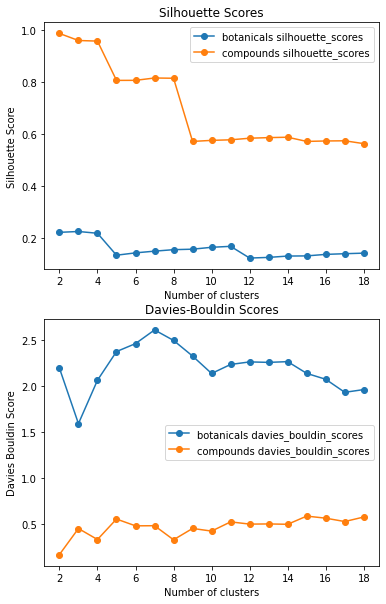

In [23]:
with open('../../data/json/agglo_features.json', 'w') as f:
    json.dump(scores, f)  

fig, ax = plt.subplots(2, 1, figsize=(6, 10))

for values in scores:
    ax[0].plot(K, scores[values]["silhouette_scores"], label=f"{values} silhouette_scores", marker='o')
    ax[1].plot(K, scores[values]["davies_bouldin_scores"], label=f"{values} davies_bouldin_scores", marker='o')
    
ax[0].set_title("Silhouette Scores")
ax[1].set_title("Davies-Bouldin Scores")
ax[0].set_xlabel("Number of clusters")
ax[1].set_xlabel("Number of clusters")
ax[0].set_ylabel("Silhouette Score")
ax[1].set_ylabel("Davies Bouldin Score")
ax[0].legend()
ax[1].legend()


plt.show()

In [6]:
tsne = TSNE(n_components=2, random_state=150)
tsne_results = tsne.fit_transform(botanicals)
x = tsne_results[:, 0]
y = tsne_results[:, 1]

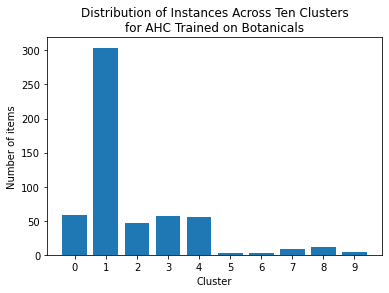

In [22]:
agglo = AgglomerativeClustering(n_clusters=10).fit(botanicals)
labels = agglo.labels_
category_dist = np.unique(labels, return_counts=True)

with open('../../data/json/Agglo_botanicals_labels.json', 'w') as f:
    json_file =  {'labels': [x.tolist() for x in category_dist]}
    json.dump(json_file, f)
plt.bar(category_dist[0], category_dist[1])
plt.xlabel("Cluster")
plt.xticks(category_dist[0])
plt.ylabel("Number of items")
plt.title("Distribution of Instances Across Ten Clusters\nfor AHC Trained on Botanicals")
plt.show()

In [9]:
json_file =  {'labels': [x.tolist() for x in category_dist]}
json_file

{'labels': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  [58, 304, 47, 57, 56, 3, 3, 8, 12, 4]]}

Text(0, 0.5, 't-SNE Component 2')

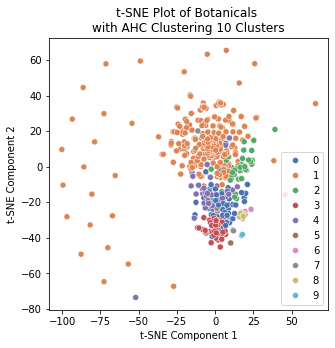

In [13]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x, y=y, hue=agglo.labels_, palette="deep", legend="full")
plt.title("t-SNE Plot of Botanicals \nwith AHC Clustering 10 Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

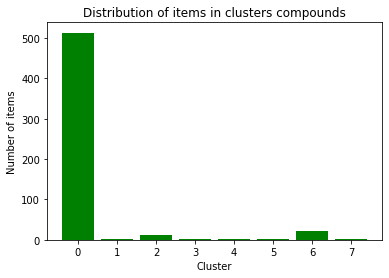

In [5]:
agglo = AgglomerativeClustering(n_clusters=8).fit(compounds)
labels = agglo.labels_
category_dist = np.unique(labels, return_counts=True)
with open('../../data/json/Agglo_compounds_labels.json', 'w') as f:
    json_file =  {'labels': [x.tolist() for x in category_dist]}
    json.dump(json_file, f)
    
plt.bar(category_dist[0], category_dist[1], color='green')
plt.xlabel("Cluster")
plt.xticks(category_dist[0])
plt.ylabel("Number of items")
plt.title("Distribution of items in clusters compounds")
plt.show()

In [33]:
tsne = TSNE(n_components=2, random_state=150)
tsne_results = tsne.fit_transform(compounds)
x = tsne_results[:, 0]
y = tsne_results[:, 1]

Text(0, 0.5, 't-SNE Component 2')

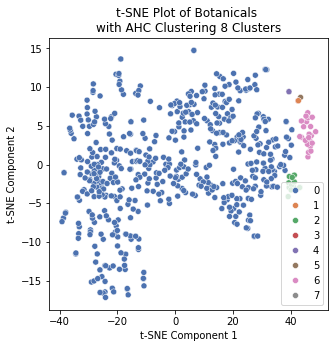

In [45]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x, y=y, hue=agglo.labels_, palette="deep", legend="full")
plt.title("t-SNE Plot of Botanicals \nwith AHC Clustering 8 Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")